In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
data=pd.read_csv('50_Startups (3).csv')
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [27]:
data.shape

(50, 5)

In [28]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [30]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [31]:
data.duplicated().any()

False

In [32]:
startup_data = data.rename({'R&D Spend':'research','Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis=1)
startup_data.head()

,research,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
startup_data[startup_data.values==0.00]

,research,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [35]:
startup_data[startup_data.duplicated()].shape

(0, 5)

In [36]:
continuous_feature = [feature for feature in startup_data.columns if startup_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


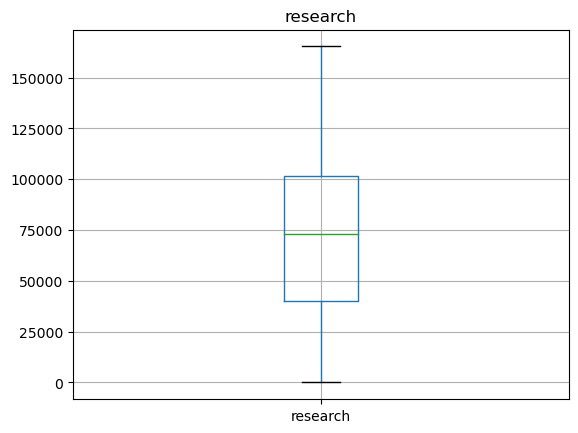

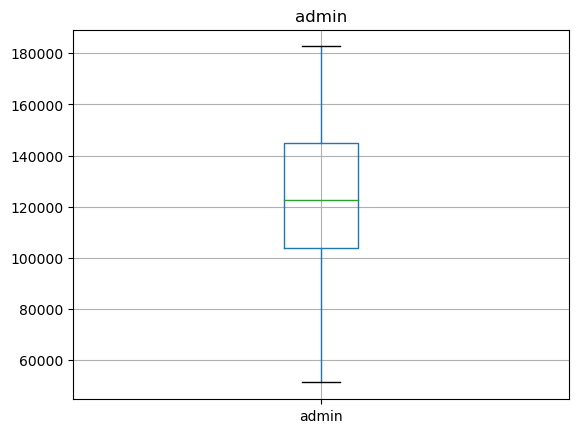

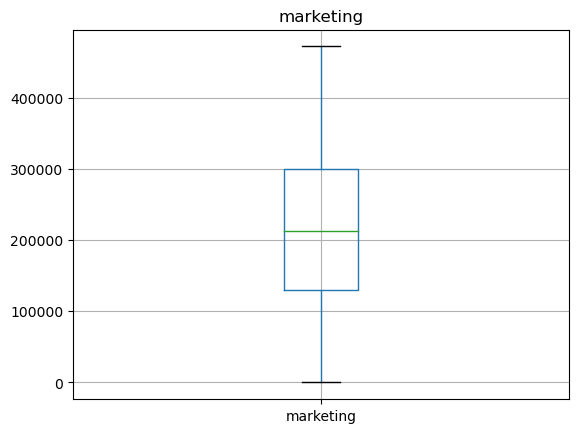

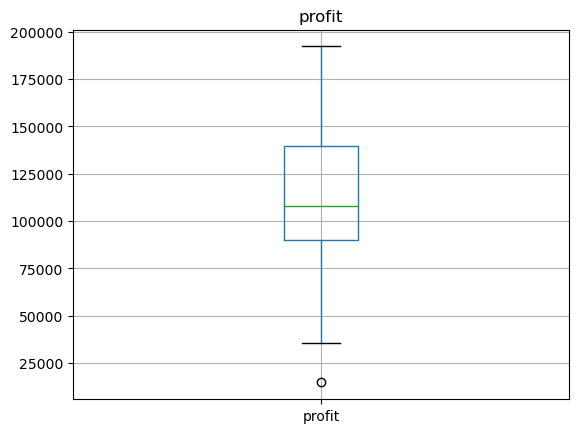

In [39]:
for feature in continuous_feature: 
    startup_data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [40]:
Outliers = startup_data.profit[(startup_data.profit <= lower_bound) | (startup_data.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [41]:

display(startup_data[startup_data.index.isin([49])])

,research,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1680\3672332343.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


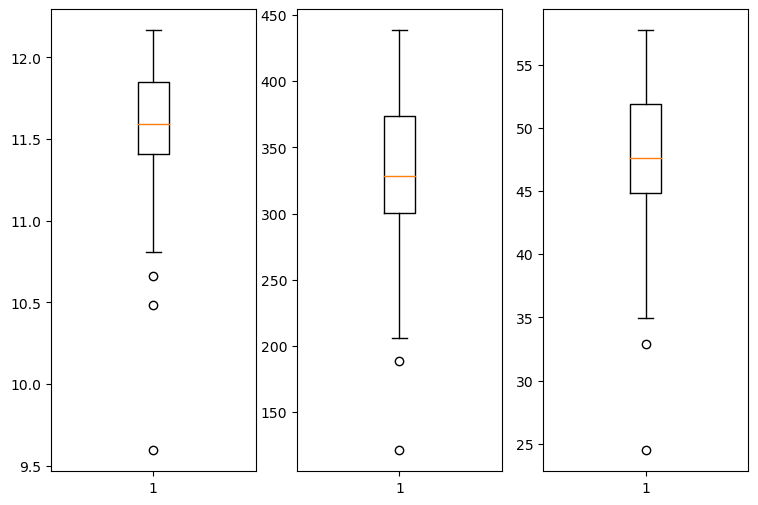

In [42]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(startup_data['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(startup_data['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(startup_data['profit']))
plt.show()

In [44]:
raw_model = smf.ols("profit ~ research + admin + marketing", data = startup_data).fit()

In [45]:
print('R-squared     :',raw_model.rsquared.round(3))
print('Adj.R-squared :',raw_model.rsquared_adj.round(3))

R-squared     : 0.951
Adj.R-squared : 0.948


In [46]:
startup_data.profit.median()

107978.19

In [50]:
median_imputation_model = smf.ols("profit ~ research + admin + marketing", data = startup_data1).fit()

In [51]:
print('R-squared     :',median_imputation_model.rsquared.round(3))
print('Adj.R-squared :',median_imputation_model.rsquared_adj.round(3))

R-squared     : 0.951
Adj.R-squared : 0.948


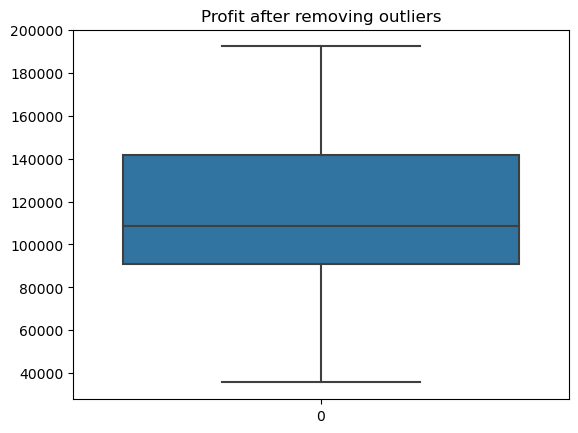

In [53]:
startup_data3 = startup_data.copy()
def drop_outliers(startup_data3, field_name):
    iqr = 1.5*(np.percentile(startup_data3[field_name], 75) - np.percentile(startup_data3[field_name], 25))
    startup_data3.drop(startup_data3[startup_data3[field_name] > (iqr + np.percentile(startup_data3[field_name], 75))].index, inplace=True)
    startup_data3.drop(startup_data3[startup_data3[field_name] < (np.percentile(startup_data3[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(startup_data3, 'profit')
sns.boxplot(startup_data3.profit)
plt.title('Profit after removing outliers')
plt.show()

In [54]:
removed_outlier_model = smf.ols("profit ~ research + admin + marketing", data = startup_data3).fit()

In [55]:
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.961
Adj.R-squared : 0.959


In [56]:
startup_data3.columns

Index(['research', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [58]:
startup_data4 = startup_data3.drop('state',axis=1)
startup_data4.head()

,research,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [59]:
startup_data4.corr()

,research,admin,marketing,profit
research,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


In [60]:
data_standard_scaled = startup_data4.copy()
features = data_standard_scaled[continuous_feature]

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
data_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
data_standard_scaled.head()

,research,admin,marketing,profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


In [64]:
print('Mean' '\n',np.round(data_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(data_standard_scaled.std()),1)

Mean
 research     0.0
admin       -0.0
marketing   -0.0
profit      -0.0
dtype: float64 
Standard Devaition 
 research     1.0
admin        1.0
marketing    1.0
profit       1.0
dtype: float64 1


In [65]:
model = smf.ols("profit ~ research + admin + marketing", data = data_standard_scaled).fit()

In [66]:
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.961
Adj.R-squared : 0.959


In [67]:
model.params

Intercept   -1.353084e-16
research     9.254411e-01
admin       -1.646059e-02
marketing    8.009988e-02
dtype: float64

In [68]:
display(np.round(model.tvalues,3), np.round(model.pvalues,3))

Intercept    -0.000
research     20.470
admin        -0.518
marketing     1.825
dtype: float64

Intercept    1.000
research     0.000
admin        0.607
marketing    0.075
dtype: float64

In [69]:
admin_slr_model = smf.ols("profit ~ admin", data = data_standard_scaled).fit()

In [70]:
print('R-squared     :',admin_slr_model.rsquared.round(3))
print('Adj.R-squared :',admin_slr_model.rsquared_adj.round(3))

R-squared     : 0.042
Adj.R-squared : 0.022


In [71]:
display(np.round(admin_slr_model.tvalues,3), np.round(admin_slr_model.pvalues,3))

Intercept   -0.000
admin        1.442
dtype: float64

Intercept    1.000
admin        0.156
dtype: float64

In [72]:
marketing_slr_model = smf.ols("profit ~ marketing", data = data_standard_scaled).fit()

In [75]:
print('R-squared     :',marketing_slr_model.rsquared.round(3))
print('Adj.R-squared :',marketing_slr_model.rsquared_adj.round(3))

R-squared     : 0.547
Adj.R-squared : 0.537


In [76]:
display(np.round(marketing_slr_model.tvalues,3), np.round(marketing_slr_model.pvalues,3))

Intercept   -0.000
marketing    7.527
dtype: float64

Intercept    1.0
marketing    0.0
dtype: float64

In [78]:
admin_plus_marketing = smf.ols('profit ~ admin + marketing', data =data_standard_scaled).fit()

In [79]:
print('R-squared     :',admin_plus_marketing.rsquared.round(3))
print('Adj.R-squared :',admin_plus_marketing.rsquared_adj.round(3))

R-squared     : 0.601
Adj.R-squared : 0.584


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [84]:
x = startup_data4[['marketing','admin','research']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.218831
0,marketing,7.589312
2,research,8.602235


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [86]:
x = startup_data4[['marketing','research']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,marketing,7.186744
1,research,7.186744


In [87]:
startup_data4.head(1)

,research,admin,marketing,profit
0,165349.2,136897.8,471784.1,192261.83


In [88]:
admin_present_model = smf.ols('profit ~ research + admin', data= data_standard_scaled).fit()
print('R-squared     :',admin_present_model.rsquared.round(3))
print('Adj.R-squared :',admin_present_model.rsquared_adj.round(3))
print('AIC Value     :',admin_present_model.aic.round(3))
print('BIC Value     :',admin_present_model.bic.round(3))
print('P-Value       :\n',admin_present_model.pvalues)

R-squared     : 0.958
Adj.R-squared : 0.957
AIC Value     : -10.808
BIC Value     : -5.133
P-Value       :
 Intercept    1.000000e+00
research     5.451979e-33
admin        2.728844e-01
dtype: float64


In [89]:
marketing_present_model = smf.ols('profit ~ research + marketing', data= data_standard_scaled).fit()
print('R-squared     :',marketing_present_model.rsquared.round(3))
print('Adj.R-squared :',marketing_present_model.rsquared_adj.round(3))
print('AIC Value     :',marketing_present_model.aic.round(3))
print('BIC Value     :',marketing_present_model.bic.round(3))
print('P-Value       :\n',marketing_present_model.pvalues)

R-squared     : 0.961
Adj.R-squared : 0.959
AIC Value     : -14.017
BIC Value     : -8.342
P-Value       :
 Intercept    1.000000e+00
research     3.628510e-26
marketing    4.084443e-02
dtype: float64


In [90]:
startup_data.columns

Index(['research', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [104]:
features = startup_data4.drop('profit', axis = 1).values

In [105]:
target= startup_data4.iloc[:,3:].values.reshape(-1,1)

In [106]:
print('The shape of fatures',features.shape)
print('The shpe of target',target.shape)

The shape of fatures (49, 3)
The shpe of target (49, 1)


In [107]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 13)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (39, 3)
Shape of X_test  :  (10, 3)
Shape of y_train :  (39, 1)
Shape of y_test  :  (10, 1)


In [108]:
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 

In [109]:
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)

In [110]:
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

In [111]:
lin_model=LinearRegression()

In [112]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [115]:
lin_reg_model = LinearRegression().fit(x_train, y_train)

In [116]:
print(lin_reg_model.score(x_train, y_train),lin_reg_model.score(x_test, y_test))

0.9613369174842474 0.9571118909104591


In [117]:
X_test_scaled = transformer_x.transform(x_test)

In [120]:
prediction = lin_model.predict(X_test_scaled)

In [121]:
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [128]:
cv_linear = cross_val_score(estimator = lin_model, X = x_train_scal, y = y_train_scal, cv = 10)

In [134]:
y_pred_linear_train = lin_model.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

In [136]:
y_pred_linear_test = lin_model.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

In [141]:
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                      :", cv_linear.mean())
print("R2_score (train)        :", r2_score_all_feature_train)
print("R2_score (test)         :" , r2_score_all_feature_test)
print("RMSE using all features :", rmse_linear_using_all_features)

CV                      : 0.7452761878241341
R2_score (train)        : -2705279413.419598
R2_score (test)         : -2056385213.591524
RMSE using all features : 1900784480.4586997


In [143]:
final_model = smf.ols('profit ~ research', data= data_standard_scaled).fit()
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))
print('P-Value       :\n',final_model.pvalues)

R-squared     : 0.957
Adj.R-squared : 0.956
AIC Value     : -11.514
BIC Value     : -7.73
P-Value       :
 Intercept    1.000000e+00
research     7.555104e-34
dtype: float64


In [144]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

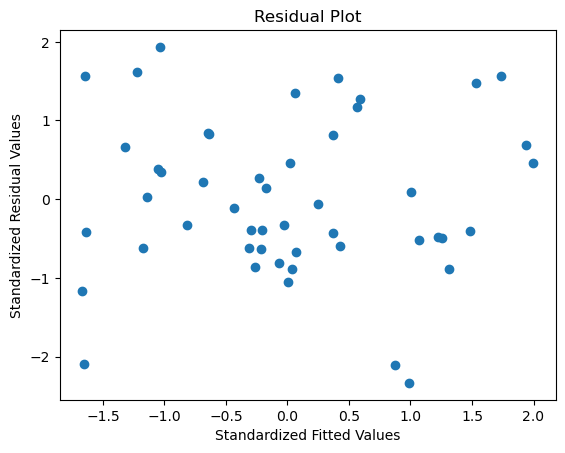

In [145]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [146]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance

In [147]:
k = startup_data4.shape[1]
n = startup_data4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


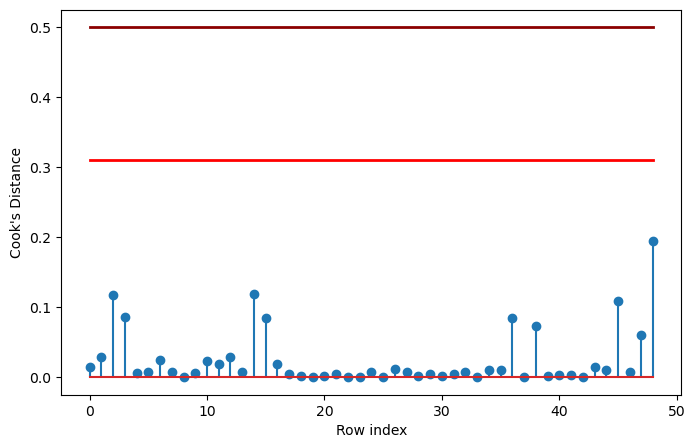

In [150]:
fig = plt.figure(figsize = (8,5))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y, color = 'darkred', linewidth = 2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(startup_data4)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [166]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = startup_data4.profit
predicted['RnD'] = startup_data4.research
predicted


,Predicted_Profit,Profit,RnD
0,1.900854e+09,192261.83,165349.20
1,1.900948e+09,191792.06,162597.70
2,1.900900e+09,191050.39,153441.51
3,1.900846e+09,182901.99,144372.41
4,1.900963e+09,166187.94,142107.34
5,1.900929e+09,156991.12,131876.90
6,1.900865e+09,156122.51,134615.46
7,1.900889e+09,155752.60,130298.13
8,1.900900e+09,152211.77,120542.52
9,1.900939e+09,149759.96,123334.88
